In [1]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv(r'data/data_processed.csv')
df_continous = pd.read_csv(r'data/data_continous.csv')
df_categorical = pd.read_csv(r'data/data_categorical.csv')

# --------------------------------------------------------------------------------------------------
# copying job satisfaction into new array
JAtt = df['Attrition'].values

df_good = pd.concat([df_categorical, df["MonthlyIncome"], df["BusinessTravel"], df["StockOptionLevel"], df["DistanceFromHome"]], axis=1)
df = df_good.drop(['Attrition'], axis=1)

# splitting inputs by row index
# all data
df_training = df.iloc[:1200,:]
df_validation = df.iloc[1200:,:]
# continous data
df_training_continous = df_continous.iloc[:1200,:]
df_validation_continous = df_continous.iloc[1200:,:]
# categorical data
df_training_categorical = df_categorical.iloc[:1200,:]
df_validation_categorical = df_categorical.iloc[1200:,:]
# splitting outputs by number
JAtt_training = JAtt[:1200]
JAtt_validation = JAtt[1200:]
# --------------------------------------------------------------------------------------------------

In [2]:
plot_models = []

In [3]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# data classifier
clf = RandomForestClassifier()

clf.fit(df_training,JAtt_training)
acc = clf.score(df_validation, JAtt_validation)
acc_all = clf.score(df, JAtt)

pred = clf.predict(df_validation)
pred_all = clf.predict(df)

print(classification_report(JAtt_validation, pred))
print(classification_report(JAtt, pred_all))

# print results
print('Data accuracy: ', acc)
print('Data accuracy on all samples:', acc_all)

# print(allColumnsNames)

plot_models.append({"name": "RandomForestClassifier", "acc_new": acc,  "accuracy_all": acc_all})

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       221
           1       0.73      0.16      0.27        49

    accuracy                           0.84       270
   macro avg       0.78      0.57      0.59       270
weighted avg       0.82      0.84      0.79       270

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1233
           1       0.98      0.83      0.90       237

    accuracy                           0.97      1470
   macro avg       0.98      0.91      0.94      1470
weighted avg       0.97      0.97      0.97      1470

Data accuracy:  0.837037037037037
Data accuracy on all samples: 0.9700680272108844


In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# data classifier
clf = LinearDiscriminantAnalysis()

clf.fit(df_training,JAtt_training)
acc = clf.score(df_validation, JAtt_validation)
acc_all = clf.score(df, JAtt)

pred = clf.predict(df)

print(classification_report(JAtt, pred))

# print results
print('Data accuracy on only new samples: ', acc)
print('Data accuracy on all samples: ', acc_all)

plot_models.append({"name": "LinearDiscrimantAnalysis", "acc_new": acc,  "accuracy_all": acc_all})

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1233
           1       0.70      0.34      0.46       237

    accuracy                           0.87      1470
   macro avg       0.79      0.66      0.69      1470
weighted avg       0.85      0.87      0.85      1470

Data accuracy on only new samples:  0.8740740740740741
Data accuracy on all samples:  0.8700680272108844


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()
df_training = scaler.fit_transform(df_training)
maxiter = np.ceil(10**6 / 1200)

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=maxiter, tol=1e-5)

clf.fit(df_training, JAtt_training)
acc = clf.score(df_validation, JAtt_validation)
acc_all = clf.score(df, JAtt)

pred = clf.predict(df)

print(classification_report(JAtt, pred))

# print results
print('Data accuracy on only new samples: ', acc)
print('Data accuracy on all samples: ', acc_all)

plot_models.append({"name": "SGDClassifier", "acc_new": acc,  "accuracy_all": acc_all})

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1233
           1       0.00      0.00      0.00       237

    accuracy                           0.84      1470
   macro avg       0.42      0.50      0.46      1470
weighted avg       0.70      0.84      0.77      1470

Data accuracy on only new samples:  0.8185185185185185
Data accuracy on all samples:  0.8387755102040816


c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-pac

{'name': 'RandomForestClassifier', 'acc_new': 0.837037037037037, 'accuracy_all': 0.9700680272108844}
{'name': 'LinearDiscrimantAnalysis', 'acc_new': 0.8740740740740741, 'accuracy_all': 0.8700680272108844}
{'name': 'SGDClassifier', 'acc_new': 0.8185185185185185, 'accuracy_all': 0.8387755102040816}


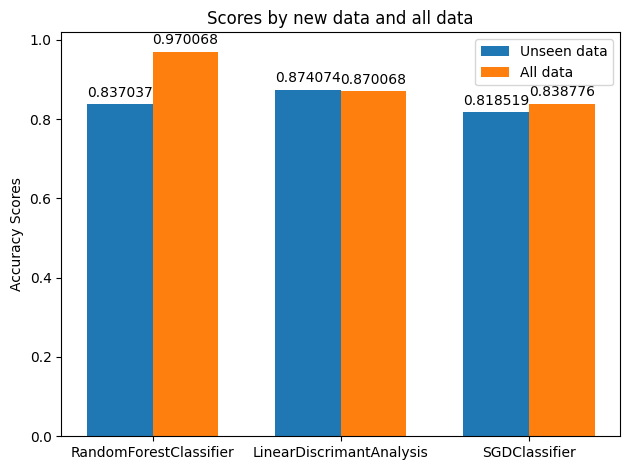

In [6]:
# plot
import matplotlib.pyplot as plt

labels = []
new_means = []
all_means = []

for model in plot_models:
    print(model)
    labels.append(model["name"])
    new_means.append(model["acc_new"])
    all_means.append(model["accuracy_all"])



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, new_means, width, label='Unseen data')
rects2 = ax.bar(x + width/2, all_means, width, label='All data')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Scores')
ax.set_title('Scores by new data and all data')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()